In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyarrow import csv
import boost_histogram as bh
from lmfit.models import *
import matplotlib.pyplot as plt

from nicks_plot_utils import *

import uproot4 as up

center_phi = {
    1: -90,
    2: -30,
    3: +30,
    4: +90,
    5: +150,
    6: -150,
  }



In [2]:
file_name = "/Users/tylern/Data/fid_cuts_pip.csv"
pyTable = csv.read_csv(file_name,read_options=csv.ReadOptions(use_threads=True))
df = pyTable.to_pandas(strings_to_categorical=True)

In [3]:
df.head()

,e_sector,e_p,e_theta,e_phi,pip_sector,pip_p,pip_theta,pip_phi,pip_theta_star,pip_phi_star
0,4,2.922909,0.386203,-1.646135,1,1.012275,0.373275,1.748828,0.521565,0.659763
1,1,3.285743,0.323701,1.518796,4,1.178756,0.462413,-1.896884,0.493608,5.415315
2,1,2.740954,0.446010,1.409826,4,1.607539,0.454848,-1.503451,0.393843,1.348897
3,6,2.276652,0.484329,2.819229,4,0.240783,0.704619,-1.386464,2.108293,4.669201
4,1,2.464282,0.423797,1.495786,4,0.804083,0.989109,-1.264403,1.741319,2.602578


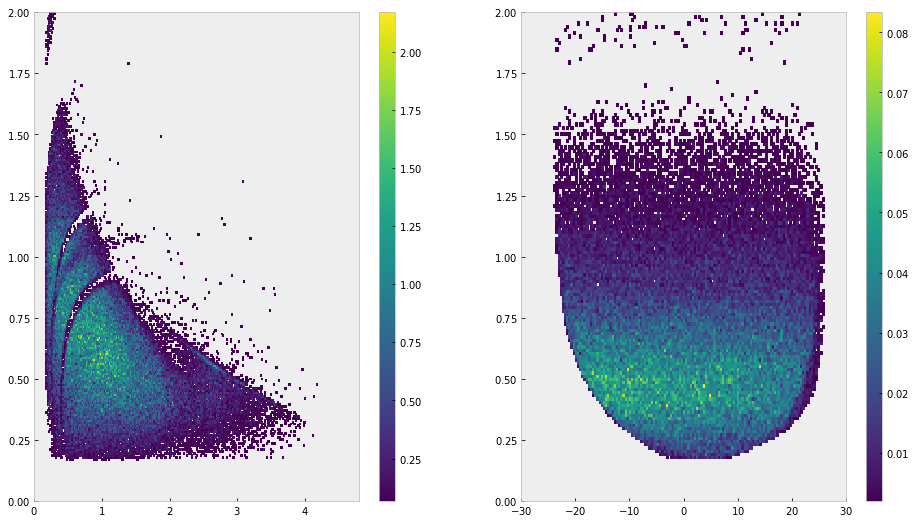

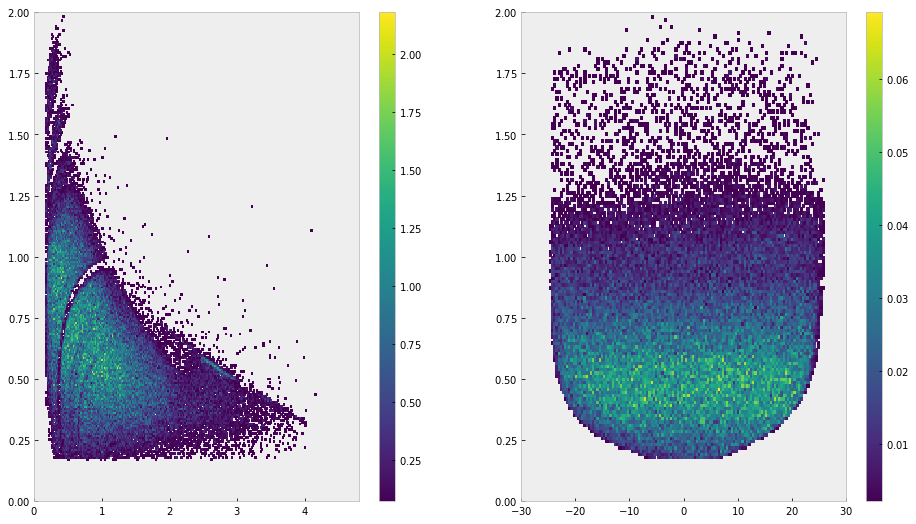

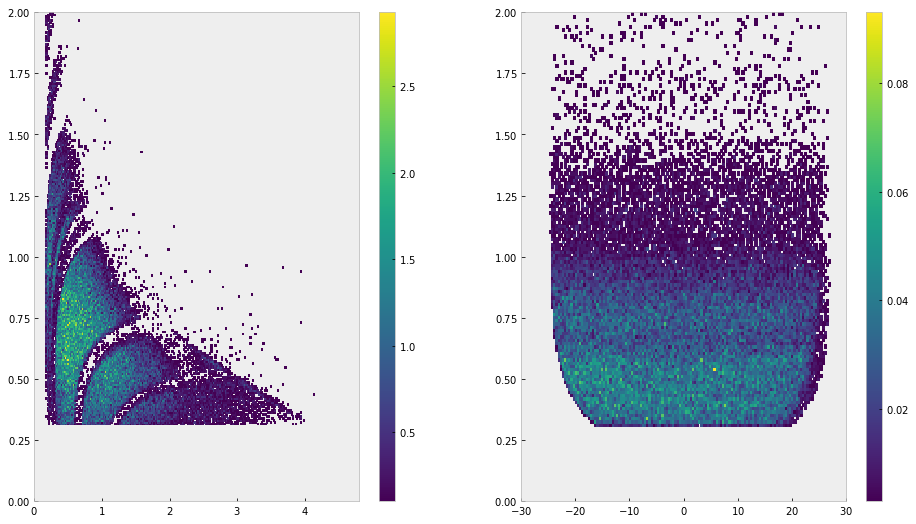

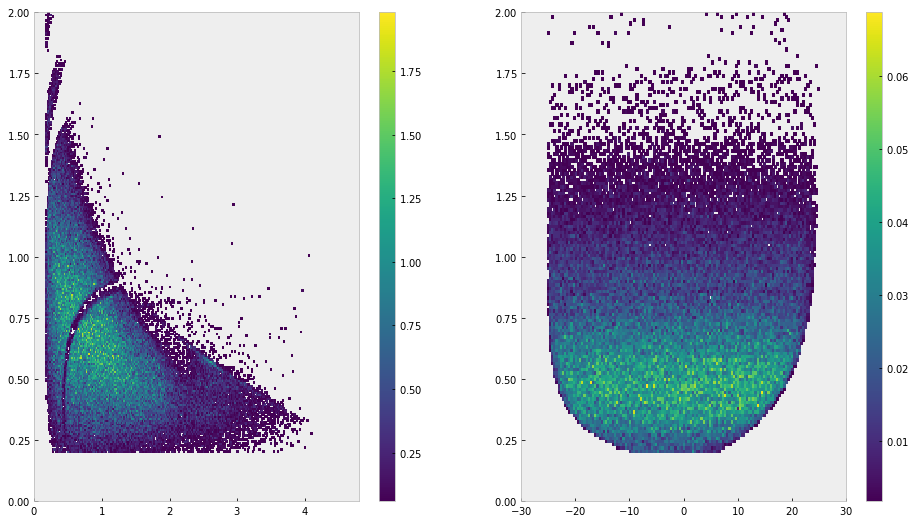

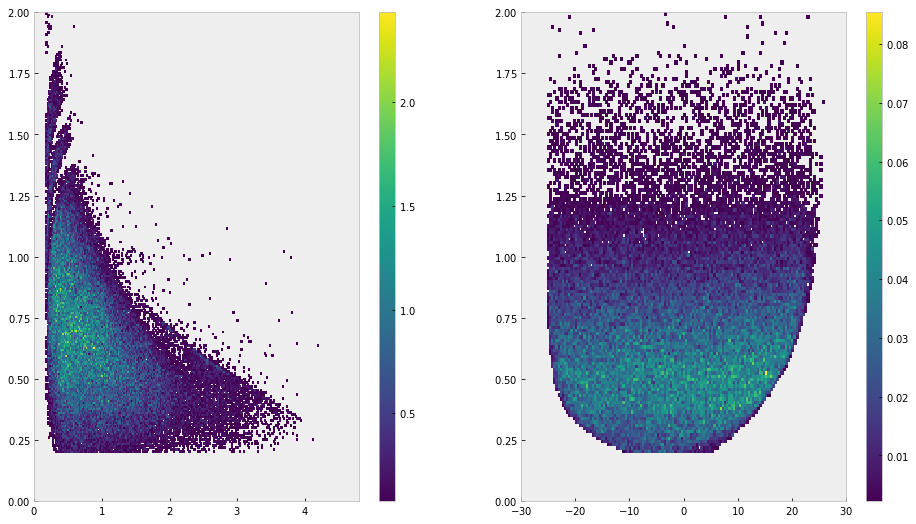

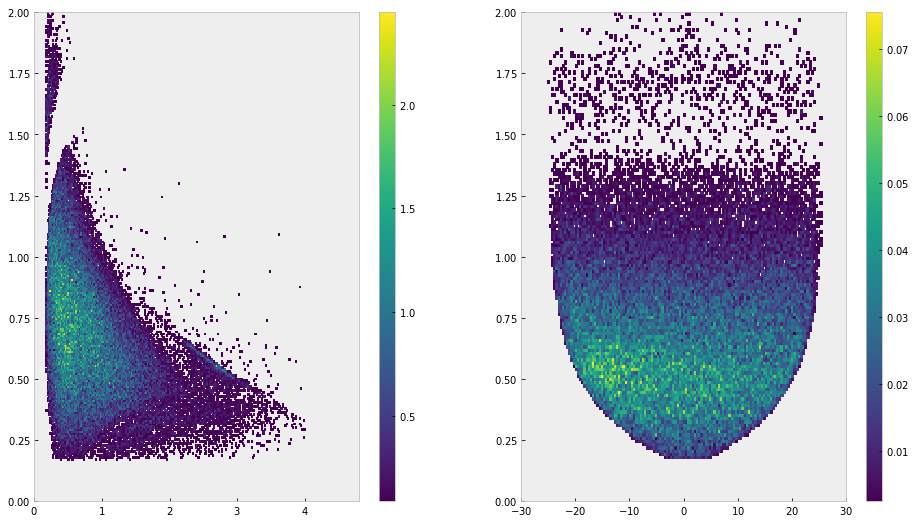

In [4]:
for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
    # _df = df[df.pip_sector == sec]
    _df = df[(df.pip_sector == sec)]
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[0], zeros=False)
    
    epphitheta = Hist2D(xdata=np.rad2deg(_df.pip_phi)+center_phi[sec], ydata=_df.pip_theta, 
                        xbins=150, ybins=150, xrange=[-30,30], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    plt.show()

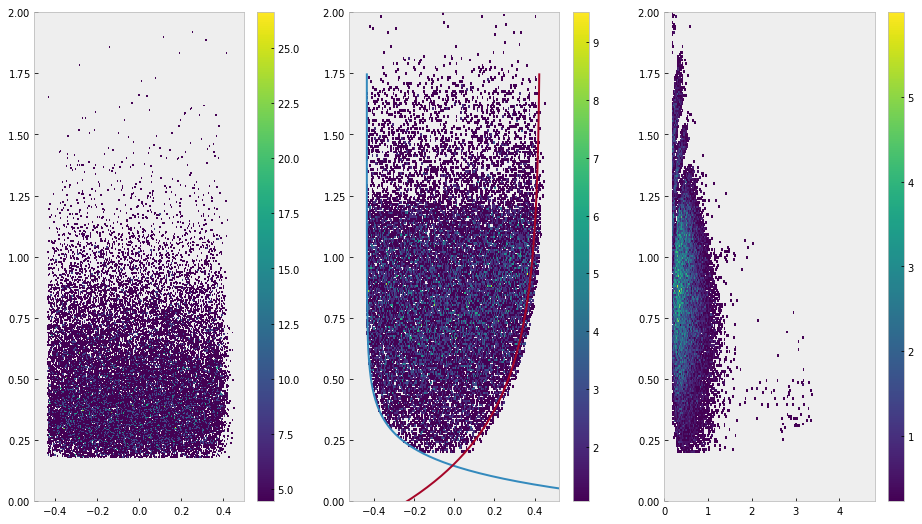

In [5]:

sec = 5

thetas = np.linspace(-30, 100, 200)
phis = np.linspace(0, 1, 200)


a0mh = [25.0, 25.5, 25.5, 26, 26, 26]
a1mh = [0.07, 0.14, 0.11, 0.14, 0.15, 0.07]
a2mh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3mh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

a0xh = [25.0, 25.0, 26.0, 24, 25.5, 25]
a1xh = [0.14, 0.11, 0.13, 0.07, 0.05, 0.07]
a2xh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3xh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

def hadron_fid_phi_m(theta, sec):
    sec = sec - 1
    return (a0xh[sec] * (1.0 - np.exp(-a1xh[sec] * (theta - a2xh[sec]))) - a3xh[sec])

def hadron_fid_phi_x(theta, sec):
    sec = sec - 1
    return -1*(a0mh[sec] * (1.0 - np.exp(-a1mh[sec] * (theta - a2mh[sec]))) - a3mh[sec])



for sec in [5]:
# for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[16,9])
    ax[1].plot(np.deg2rad(hadron_fid_phi_x(thetas, sec)), np.deg2rad(thetas))
    ax[1].plot(np.deg2rad(hadron_fid_phi_m(thetas, sec)), np.deg2rad(thetas))


    _df = df[(df.pip_sector == sec) & (np.cos(df.pip_theta_star) < 0)]
    
    # top_line = 2.0
    # bot_line = 1.35
    
    # ax[1].axhline(bot_line, lw=0.5,c='b')
    # ax[1].axhline(top_line, lw=0.5, c='r')

    # _df = _df[~((_df.pip_theta > bot_line) & (_df.pip_theta < top_line))]
    eptheta = Hist2D(ydata=_df.pip_p, xdata=_df.pip_phi+np.deg2rad(center_phi[sec]), xbins=500, ybins=500, yrange=[0,2.0], xrange=[-0.5,0.5])
    eptheta.plot(ax[0], zeros=False)
    

    
    epphitheta = Hist2D(ydata=_df.pip_theta, xdata=_df.pip_phi+np.deg2rad(center_phi[sec]),
                        xbins=250, ybins=250, xrange=[np.deg2rad(-30),np.deg2rad(30)], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[2], zeros=False)



    ax[1].set_xlim(np.deg2rad(-30), np.deg2rad(30))
    ax[1].set_ylim(0, 2)

    plt.show()